In [1]:
# from google.colab import files
# data_to_load = files.upload()

Saving preprocessed_flipkart_data to preprocessed_flipkart_data


In [ ]:
# reading preprocessed data
import pandas as pd
df = pd.read_csv(r'../data/preprocessed_flipkart_data')

In [ ]:
df.columns

Index(['products', 'product_category_tree', 'description', 'brand',
       'product_names', 'combined_features'],
      dtype='object')

## Feature extraction

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range=(1, 2), min_df=0)
extracted_features = vectorizer.fit_transform(df['combined_features'])

In [5]:
extracted_features

<12676x180513 sparse matrix of type '<class 'numpy.float64'>'
	with 1069149 stored elements in Compressed Sparse Row format>

## Using cosine similarity

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(extracted_features, extracted_features)

In [7]:
type(cos_sim)

numpy.ndarray

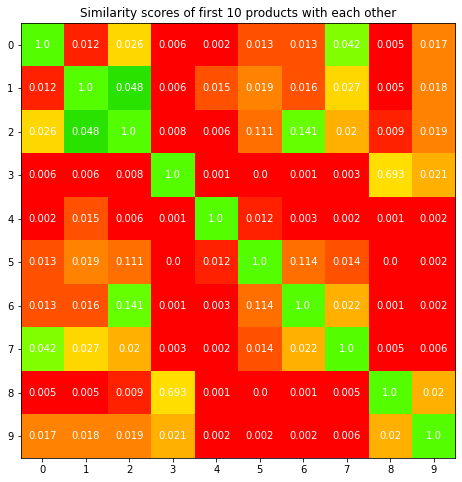

In [16]:
# visualising similarity scores
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize = (8,8))
im = ax.imshow(cos_sim[:10, :10], cmap = 'prism')

for i in range(10):
    for j in range(10):
        text = ax.text(j, i, cos_sim[i, j].round(3),
                       ha="center", va="center", color="w")

ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))

plt.title('Similarity scores of first 10 products with each other')
plt.show()

## Getting Recommendations

In [8]:
df.head(10)

,products,product_category_tree,description,brand,product_names,combined_features
0,alisha solid women cycl short,cloth women cloth lingeri sleep swimwear short...,key featur alisha solid women cycl short cotto...,alisha,Alisha Solid Women's Cycling Shorts,alisha solid women cycl shortcloth women cloth...
1,fabhomedecor fabric doubl sofa bed,furnitur live room furnitur sofa bed futon fab...,fabhomedecor fabric doubl sofa bed finish colo...,fabhomedecor,FabHomeDecor Fabric Double Sofa Bed,fabhomedecor fabric doubl sofa bedfurnitur liv...
2,aw belli,footwear women footwear ballerina aw belli,key featur aw belli sandal wedg heel casual aw...,aw,AW Bellies,aw bellifootwear women footwear ballerina aw b...
3,sicon all purpos arnica dog shampoo,pet suppli groom skin coat care shampoo sicon ...,specif sicon all purpos arnica dog shampoo ml ...,sicon,Sicons All Purpose Arnica Dog Shampoo,sicon all purpos arnica dog shampoopet suppli ...
4,etern gandhi super seri crystal paper weight s...,etern gandhi super seri crystal paper weight,key featur etern gandhi super seri crystal pap...,etern gandhi,Eternal Gandhi Super Series Crystal Paper Weig...,etern gandhi super seri crystal paper weight s...
5,dilli bazaaar belli corpor casual casual,footwear women footwear ballerina dilli bazaaa...,key featur dilli bazaaar belli corpor casual c...,dilli bazaaar,"dilli bazaaar Bellies, Corporate Casuals, Casuals",dilli bazaaar belli corpor casual casualfootwe...
6,ladela belli,footwear women footwear ballerina ladela belli,key featur ladela belli brand ladela color bla...,ladela,Ladela Bellies,ladela bellifootwear women footwear ballerina ...
7,carrel print women,cloth women cloth sport gym wear swimsuit carr...,key featur carrel print women fabric swimlycra...,carrel,Carrel Printed Women's,carrel print womencloth women cloth sport gym ...
8,sicon all purpos tea tree dog shampoo,pet suppli groom skin coat care shampoo sicon ...,specif sicon all purpos tea tree dog shampoo m...,sicon,Sicons All Purpose Tea Tree Dog Shampoo,sicon all purpos tea tree dog shampoopet suppl...
9,freelanc vacuum bottl ml bottl,pen stationeri school suppli water bottl freel...,specif freelanc vacuum bottl ml bottl pack gre...,freelanc,Freelance Vacuum Bottles 350 ml Bottle,freelanc vacuum bottl ml bottlpen stationeri s...


In [9]:
df = df.reset_index()

In [10]:
df.head(10)

,index,products,product_category_tree,description,brand,product_names,combined_features
0,0,alisha solid women cycl short,cloth women cloth lingeri sleep swimwear short...,key featur alisha solid women cycl short cotto...,alisha,Alisha Solid Women's Cycling Shorts,alisha solid women cycl shortcloth women cloth...
1,1,fabhomedecor fabric doubl sofa bed,furnitur live room furnitur sofa bed futon fab...,fabhomedecor fabric doubl sofa bed finish colo...,fabhomedecor,FabHomeDecor Fabric Double Sofa Bed,fabhomedecor fabric doubl sofa bedfurnitur liv...
2,2,aw belli,footwear women footwear ballerina aw belli,key featur aw belli sandal wedg heel casual aw...,aw,AW Bellies,aw bellifootwear women footwear ballerina aw b...
3,3,sicon all purpos arnica dog shampoo,pet suppli groom skin coat care shampoo sicon ...,specif sicon all purpos arnica dog shampoo ml ...,sicon,Sicons All Purpose Arnica Dog Shampoo,sicon all purpos arnica dog shampoopet suppli ...
4,4,etern gandhi super seri crystal paper weight s...,etern gandhi super seri crystal paper weight,key featur etern gandhi super seri crystal pap...,etern gandhi,Eternal Gandhi Super Series Crystal Paper Weig...,etern gandhi super seri crystal paper weight s...
5,5,dilli bazaaar belli corpor casual casual,footwear women footwear ballerina dilli bazaaa...,key featur dilli bazaaar belli corpor casual c...,dilli bazaaar,"dilli bazaaar Bellies, Corporate Casuals, Casuals",dilli bazaaar belli corpor casual casualfootwe...
6,6,ladela belli,footwear women footwear ballerina ladela belli,key featur ladela belli brand ladela color bla...,ladela,Ladela Bellies,ladela bellifootwear women footwear ballerina ...
7,7,carrel print women,cloth women cloth sport gym wear swimsuit carr...,key featur carrel print women fabric swimlycra...,carrel,Carrel Printed Women's,carrel print womencloth women cloth sport gym ...
8,8,sicon all purpos tea tree dog shampoo,pet suppli groom skin coat care shampoo sicon ...,specif sicon all purpos tea tree dog shampoo m...,sicon,Sicons All Purpose Tea Tree Dog Shampoo,sicon all purpos tea tree dog shampoopet suppl...
9,9,freelanc vacuum bottl ml bottl,pen stationeri school suppli water bottl freel...,specif freelanc vacuum bottl ml bottl pack gre...,freelanc,Freelance Vacuum Bottles 350 ml Bottle,freelanc vacuum bottl ml bottlpen stationeri s...


In [11]:
products = df['product_names']
indices = pd.Series(df.index, index=df['product_names'])
indices.head()

product_names
Alisha Solid Women's Cycling Shorts                                      0
FabHomeDecor Fabric Double Sofa Bed                                      1
AW Bellies                                                               2
Sicons All Purpose Arnica Dog Shampoo                                    3
Eternal Gandhi Super Series Crystal Paper Weights  with Silver Finish    4
dtype: int64

In [17]:
# function to get top 10 recommendations
def get_recommendations(product):
    ind = indices[product]
    sim_scores = list(enumerate(cos_sim[ind]))
    sim_scores = sorted(sim_scores, key = lambda x:x[1], reverse=True)
    product_indices = [i[0] for i in sim_scores[1:11]]
    return products.iloc[product_indices]

In [18]:
get_recommendations('AW Bellies')

11780    Shopnetix Stylish & Comfort Men's Lace up Moca...
7303                              Sonaxo Men Running Shoes
11137                                        Inc.5 Bellies
829                                     Inc.5 Women Wedges
1772                                      Bootwale Bellies
11164                                     i-Sports Bellies
7095                                     keco Women Wedges
5354                                     D'Panache Mojaris
11326                                      Mobiroy Bellies
12105                                     keco Women Heels
Name: product_names, dtype: object

In [19]:
get_recommendations('Purple Women Heels')

6908           TEN Women Heels
507           Nell Women Heels
6887          Liza Women Heels
6879         Kielz Women Heels
7882        Selfie Women Heels
6891       FatDuck Women Heels
6912      Chicopee Women Heels
6789        Rialto Women Heels
12674    Stylistry Women Heels
6910           iLO Women Heels
Name: product_names, dtype: object

In [20]:
get_recommendations('Uberlyfe Extra Large Vinyl Sticker')

7053          Happy walls Extra Large PVC vinyl Sticker
12672                      Uberlyfe Large Vinyl Sticker
12661    Oren Empower Extra Large Self Adhesive Sticker
5187               DeStudio Large Wall Stickers Sticker
7066                    Ddreamz Small PVC Vinyl Sticker
10555              Wallmantra Extra Large Vinyl Sticker
10141               DeStudio Small WALL STICKER Sticker
12194            Wall Decal Small Self Adhesive Sticker
12195           Wall Decal Medium Self Adhesive Sticker
9946                  DeStudio Extra Large Wall Sticker
Name: product_names, dtype: object